# 1. IMPORT

In [542]:
import numpy as np
import pandas as pd

In [543]:
# Text Preprocessing
import string #
import re # Regular Expression
import pprint # Pretty Print for long texts
from random import randint
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [544]:
# Feature Engineering
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import scipy.stats as stats

In [545]:
# Text Classification
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import tree # Decision Tree
from sklearn import ensemble # Random Forest
from sklearn import linear_model, preprocessing # Linear Regression
from sklearn.metrics import r2_score

from xgboost import XGBRegressor, plot_importance

In [546]:
# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as plx
%matplotlib inline

In [547]:
# File system
import os
from os import listdir
from os.path import isfile, join
# Warning
import warnings
warnings.filterwarnings('ignore')

# 2. READ DATA

In [548]:
df = pd.read_csv('train-chennai-sale.csv')
pd.set_option('display.max_columns', None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [549]:
df.shape

(7109, 22)

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [551]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [552]:
df.describe() # Checking the data distribution

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [553]:
# Checking correlation between columns
df.corr() 

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786348,0.515390,0.951279,0.019850,-0.008337,0.008865,0.014025,0.657544,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002566,0.001970,0.002301,0.002237,-0.029468,0.001554,-0.017313,0.011600,0.010994,0.018783
N_BEDROOM,0.786348,-0.002566,1.000000,0.755214,0.840286,0.015112,-0.007635,0.015569,0.014209,0.455357,0.430424,0.330999
N_BATHROOM,0.515390,0.001970,0.755214,1.000000,0.568688,0.013112,-0.012057,0.013196,0.007907,0.260324,0.256533,0.108884
N_ROOM,0.951279,0.002301,0.840286,0.568688,1.000000,0.016524,-0.007545,0.015072,0.015459,0.630932,0.533343,0.602760
QS_ROOMS,0.019850,0.002237,0.015112,0.013112,0.016524,1.000000,0.008828,0.007789,0.517741,0.019739,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012057,-0.007545,0.008828,1.000000,-0.011745,0.551125,-0.006719,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015569,0.013196,0.015072,0.007789,-0.011745,1.000000,0.630447,0.021526,0.020118,0.018804
QS_OVERALL,0.014025,-0.017313,0.014209,0.007907,0.015459,0.517741,0.551125,0.630447,1.000000,0.022482,0.017004,0.020556
REG_FEE,0.657544,0.011600,0.455357,0.260324,0.630932,0.019739,-0.006719,0.021526,0.022482,1.000000,0.659903,0.878148


## Observation
---------------
1. Rows: 7109 and Columns: 22
2. N_BEDROOM, N_BATHROOM, QS_OVERALL have Null values
3. N_BEDROOM and N_BATHROOM have data type float, need to be changed to int type
4. DATE_SALE and DATE_BUILD should be converted to AGE of building
5. PRT_ID column are not necessary for analysis & prediction as their is no correlation with SALES_PRICE.

# 3. TEXT PRE-PROCESSING

## 3.1 General Data Cleaning

In [554]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [555]:
# Use fillna() to add value for Null columns like N_BEDROOM, N_BATHROOM & QS_OVERALL
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0], inplace=True)
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0], inplace=True)

In [556]:
# N_BEDROOM and N_BATHROOM change datatype to int
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)

In [557]:
# Drop unnecessary column PRT_ID
df.drop(columns=['PRT_ID'], inplace=True)

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   int32  
 5   N_BATHROOM     7109 non-null   int32  
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  REG_FEE 

In [559]:
df.shape # one column dropped

(7109, 21)

In [560]:
df.isnull().sum() # No null values in any column

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [561]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


##### Observation
-------------
1. Removed all unncessary columns due to very low correlation with Sales Price
2. Filled all null datas
3. Changed the data types of two columns

## 3.2 Column by Column Cleaning

### 3.2.1 AREA

In [562]:
# Check for unique areas
print(df['AREA'].unique(), '\n Total unique areas: ', len(df['AREA'].unique()))
# Many duplicate area names are present e.g., Chrompet, Karapakkam, T Nagar, Anna Nagar, Velchery

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar'] 
 Total unique areas:  17


In [563]:
# Replacing duplicate area names with single name
df['AREA'].replace({
                    'Karapakam' : 'Karapakkam',
                    'Ana Nagar' : 'Anna Nagar',
                    'Ann Nagar' : 'Anna Nagar',
                    'Chrompt' : 'Chrompet',
                    'Chrmpet' : 'Chrompet',
                    'Chormpet' : 'Chrompet',
                    'TNagar' : 'T Nagar',
                    'Velchery' : 'Velachery',
                    'Adyr' : 'Adyar',
                    'KKNagar' : 'KK Nagar'
}, inplace=True)

In [564]:
print(df['AREA'].unique(), '\n Total unique areas: ', len(df['AREA'].unique()))
# Unique area names reduced from 17 to 7

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar'] 
 Total unique areas:  7


In [565]:
# print('Area data type before: ', df.AREA.dtype)
# df.AREA = df.AREA.astype('string')
# print('Area data type now: ', df.AREA.dtype) 

##### Observation
-----------------
1. Duplicate area names are corrected, now we have only 7 unique areas.
2. Data type of Area column is changed to String

### 3.2.2 N_BEDROOM, N_BATHROOM & N_ROOM

In [566]:
df.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

In [567]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

In [568]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

##### Observation
-----------------
1. Mostly single & double bedroom houses were sold mostly.
2. Single bathroom houses sold most.
3. Total 4 or 5 rooms house were sold most.
4. These numbers show average expectation of buyers in house.

### 3.2.3 SALE_COND

In [569]:
# Check unique keywords
print(df.SALE_COND.unique(), '\n Total unique keywords: ', len(df.SALE_COND.unique()))
# Contains duplicate keywords

['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl'] 
 Total unique keywords:  9


In [570]:
# Replacing duplicate keywords with single keyword
df.SALE_COND.replace({
                        'Ab Normal' : 'AbNormal',
                        'Partiall' : 'Partial',
                        'PartiaLl' : 'Partial',
                        'AdjLand' : 'Adj Land'
}, inplace=True)

In [571]:
# After cleaning
print(df.SALE_COND.unique(), '\n Total unique keywords: ', len(df.SALE_COND.unique()))

['AbNormal' 'Family' 'Partial' 'Adj Land' 'Normal Sale'] 
 Total unique keywords:  5


In [572]:
df.SALE_COND.value_counts()
# Normal Sale 
# Abnorml: Abnormal Sale - trade, foreclosure, short sale 
# AdjLand: Adjoining Land Purchase 
# Family: Sale between family members 
# Partial: Home was not completed when last assessed

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

##### Observation
-----------------
1. Duplicate Sale condition keywords are replaced. Now only 5 sales condition remain.

### 3.2.4 PARK_FACIL

In [573]:
# Check for unique keywords
print(df.PARK_FACIL.unique(), '\n Total unique keywords: ', len(df.PARK_FACIL.unique() ))
# Duplicates exists

['Yes' 'No' 'Noo'] 
 Total unique keywords:  3


In [574]:
# Replace duplicate keywords
df.PARK_FACIL.replace({
                        'Noo' : 'No'
}, inplace=True)

In [575]:
# After Cleaning
print(df.PARK_FACIL.unique(), '\n Total unique keywords: ', len(df.PARK_FACIL.unique() ))

['Yes' 'No'] 
 Total unique keywords:  2


In [576]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

##### Observation
-----------------
1. Duplicate keywords 'Noo' was chanted to 'No'
2. Houses with and without Parking facilities were sold almost equally.

### 3.2.5 BUILDTYPE

In [577]:
# Check for unique keywords
print(df.BUILDTYPE.unique(), '\n Total unique keywords: ', len(df.BUILDTYPE.unique() ))
# Duplicates exists

['Commercial' 'Others' 'Other' 'House' 'Comercial'] 
 Total unique keywords:  5


In [578]:
# Replacing duplicate keywords
df.BUILDTYPE.replace({
                        'Comercial' : 'Commercial',
                        'Other' : 'Others'
}, inplace=True)

In [579]:
# After Cleaning
print(df.BUILDTYPE.unique(), '\n Total unique keywords: ', len(df.BUILDTYPE.unique() ))

['Commercial' 'Others' 'House'] 
 Total unique keywords:  3


In [580]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

##### Observation
-----------------
1. Duplicate keywords Commerical & Others were cleaned
2. Mostly build type of house were sold

### 3.2.6 UTILITY_AVAIL

In [581]:
# Check for unique keywords
print(df.UTILITY_AVAIL.unique(), '\n Total unique keywords: ', len(df.UTILITY_AVAIL.unique() ))
# Duplicates exists

['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub'] 
 Total unique keywords:  5


In [582]:
# Replacing duplicate keywords
df.UTILITY_AVAIL.replace({
                        'All Pub' : 'AllPub',
                        'NoSewr ' : 'NoSewr'
}, inplace=True)

In [583]:
# After Cleaning
print(df.UTILITY_AVAIL.unique(), '\n Total unique keywords: ', len(df.UTILITY_AVAIL.unique() ))

['AllPub' 'ELO' 'NoSewr' 'NoSeWa'] 
 Total unique keywords:  4


In [584]:
df.UTILITY_AVAIL.value_counts()
# AllPub: All public Utilities (E,G,W,& S)
# NoSewr: Electricity, Gas, and Water (Septic Tank)
# NoSeWa: Electricity and Gas Only
# ELO: Electricity only STREET

AllPub    1887
NoSeWa    1871
NoSewr    1829
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

##### Observation
-----------------
1. Duplicate keyword AllPub was cleaned
2. Mostly AllPub utility type of house were sold

### 3.2.7 STREET

In [585]:
# Check for unique keywords
print(df.STREET.unique(), '\n Total unique keywords: ', len(df.STREET.unique() ))
# Duplicates exists

['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess'] 
 Total unique keywords:  5


In [586]:
# Replacing duplicate keywords
df.STREET.replace({
                        'Pavd' : 'Paved',
                        'NoAccess' : 'No Access'
}, inplace=True)

In [587]:
# After Cleaning
print(df.STREET.unique(), '\n Total unique keywords: ', len(df.STREET.unique() ))

['Paved' 'Gravel' 'No Access'] 
 Total unique keywords:  3


In [588]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

##### Observation
-----------------
1. Duplicate keyword Pavd, NoAccess were cleaned
2. Mostly Paved & Gravel street house were sold

### 3.2.8 MZZONE

In [589]:
# Check for unique keywords
print(df.MZZONE.unique(), '\n Total unique keywords: ', len(df.MZZONE.unique() ))
# NO Duplicates exists

['A' 'RH' 'RL' 'I' 'C' 'RM'] 
 Total unique keywords:  6


In [590]:
df.MZZONE.value_counts()
# A: Agriculture
# C: Commercial
# I: Industrial
# RH: Residential High Density
# RL: Residential Low Density
# RM: Residential Medium Density

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

##### Observation
-----------------
1. Mostly houses in residential low and medium density were sold

### 3.2.9 REG_FEE & COMMIS

In [591]:
# Correlation value for REG_FEE & COMMIS
print(df.REG_FEE.corr(df.SALES_PRICE))
print(df.COMMIS.corr(df.SALES_PRICE))

0.8781483918228501
0.6262754127126994


##### Observation
-----------------
1. Registration fee and commisions are totally dependent on sales price, therefore the correlation is high.
2. These two columns can be removed as registration fee and commission comes after deciding sale price of the property.

### 3.2.10 DATE_SALE & DATE_BUILD

In [592]:
# Data type of Date Build and Date Sale
print(df.DATE_BUILD.dtype)
print(df.DATE_SALE.dtype)

object
object


In [593]:
# Changing data type to Date/Time format
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)

In [594]:
# Data type of Date Build and Date Sale
print(df.DATE_BUILD.dtype)
print(df.DATE_SALE.dtype)

datetime64[ns]
datetime64[ns]


In [595]:
df[['DATE_BUILD', 'DATE_SALE']].head()

,DATE_BUILD,DATE_SALE
0,1967-05-15,2011-04-05
1,1995-12-22,2006-12-19
2,1992-09-02,2012-04-02
3,1988-03-18,2010-03-13
4,1979-10-13,2009-05-10


##### Observation
-----------------
1. Changed the data type to datetime format
2. Age of each house can be calculated

# 4. FEATURE ENGINEERING

## 4.1 HOUSE_AGE

In [596]:
# Create Age of the Building coloumn : HOUSE_AGE
df['HOUSE_AGE'] = ((df.DATE_SALE - df.DATE_BUILD)/np.timedelta64(1, 'Y')).astype('int')
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29


In [597]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE, format='%d-%m-%y').dt.strftime('%d-%m-%y')
df.DATE_SALE.dtype

dtype('O')

In [598]:
# First & last date of sale for each area
df.groupby(['AREA']).agg({'DATE_SALE' : [np.min, np.max]})

DATE_SALE          
                amin      amax
AREA                          
Adyar       01-01-07  31-12-11
Anna Nagar  01-01-07  31-12-11
Chrompet    01-01-07  31-12-14
KK Nagar    01-01-09  31-12-09
Karapakkam  01-01-11  31-12-09
T Nagar     01-01-15  31-12-07
Velachery   01-01-05  31-12-04

In [599]:
year_data = pd.DataFrame(pd.DatetimeIndex(df['DATE_SALE']).year.value_counts())
year_data.rename(columns={'DATE_SALE':'Count'}, inplace=True)
year_data # This feature will be used in EDA.

,Count
2010,1341
2011,1300
2009,1122
2008,814
2012,654
2007,651
2013,365
2014,335
2006,253
2004,116


## 4.2 Dimensionality Reduction

### 4.2.1 Correlation graph

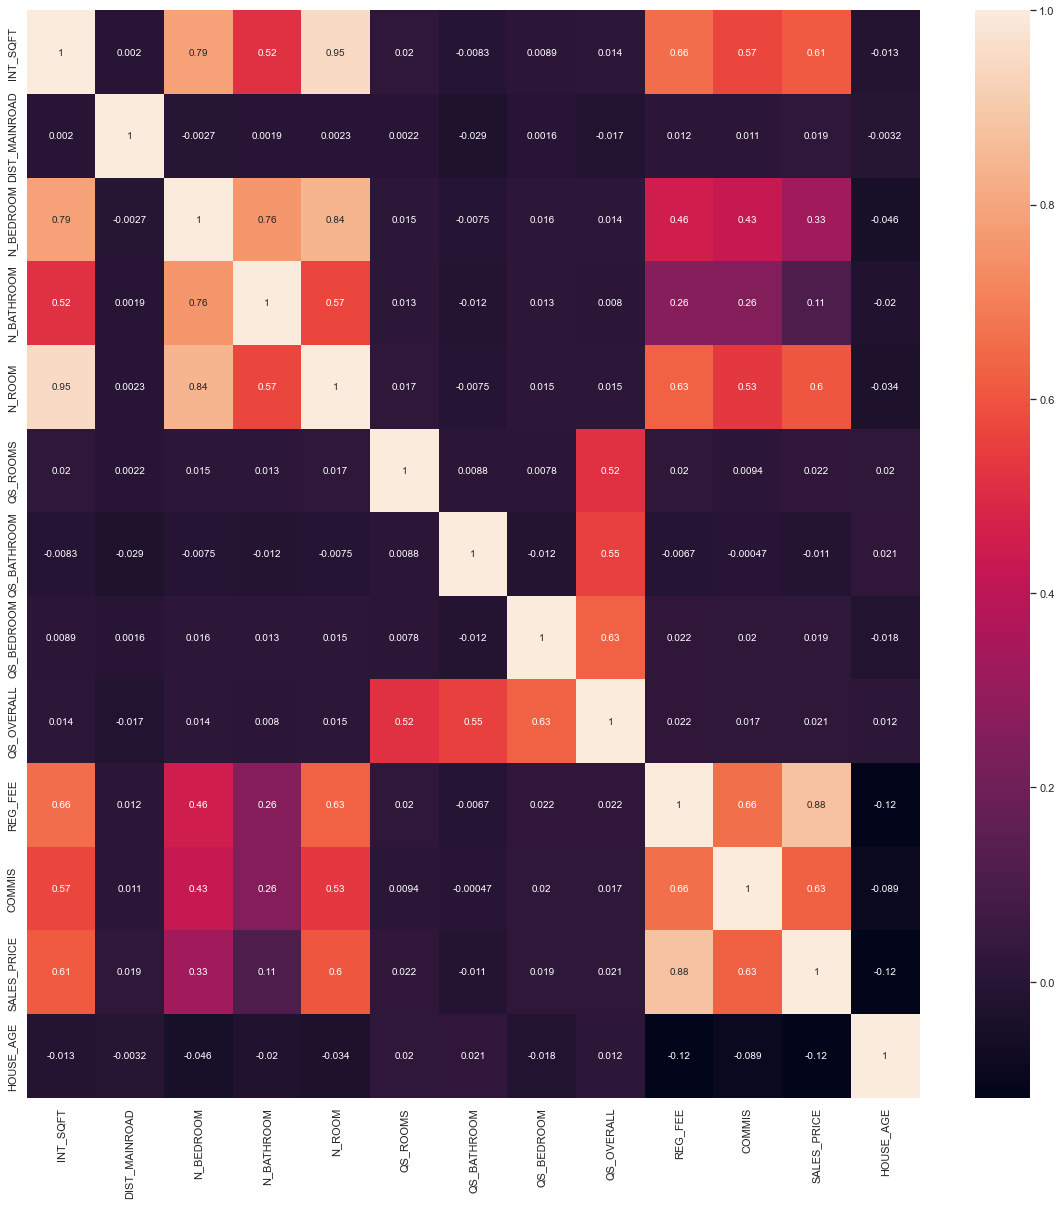

In [600]:
# Heat map
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
# plx.imshow(df.corr(), text_auto=True, height=1250, width=1250)
plt.show()

### 4.2.2 Quality Score (QS) : ROOM, BEDROOM, BATHROOM & OVERALL

Correlation of QS with SALES_PRICE in (%): 
QS_OVERALL:  2.0556111968052
QS_ROOMS:  2.196740547164276
QS_BATHROOM:  -1.1377384945967053
QS_BEDROOM:  1.8803963059181317


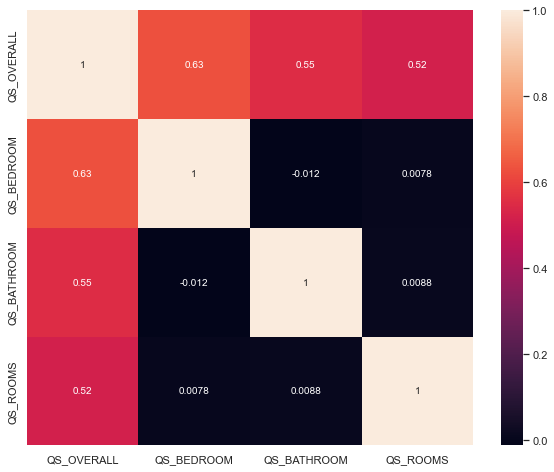

In [601]:
# Correlation value for QS_OVERALL, QS_ROOMS, QS_BATHROOM, QS_BEDROOM w.r.t. SALES_PRICE
print('Correlation of QS with SALES_PRICE in (%): ')
print('QS_OVERALL: ', df.QS_OVERALL.corr(df.SALES_PRICE)*100)
print('QS_ROOMS: ', df.QS_ROOMS.corr(df.SALES_PRICE)*100)
print('QS_BATHROOM: ', df.QS_BATHROOM.corr(df.SALES_PRICE)*100)
print('QS_BEDROOM: ', df.QS_BEDROOM.corr(df.SALES_PRICE)*100)

# Columns which have less than 5% correlation with SALES_PRICE is not necessary for predicting SALES_PRICE

plt.figure(figsize=(10, 8))
sns.heatmap(
    df[['QS_OVERALL', 'QS_BEDROOM', 'QS_BATHROOM', 'QS_ROOMS']].corr()[['QS_OVERALL', 'QS_BEDROOM', 'QS_BATHROOM', 'QS_ROOMS']], 
            annot=True)

plt.show()
# Correlation between these 4 features

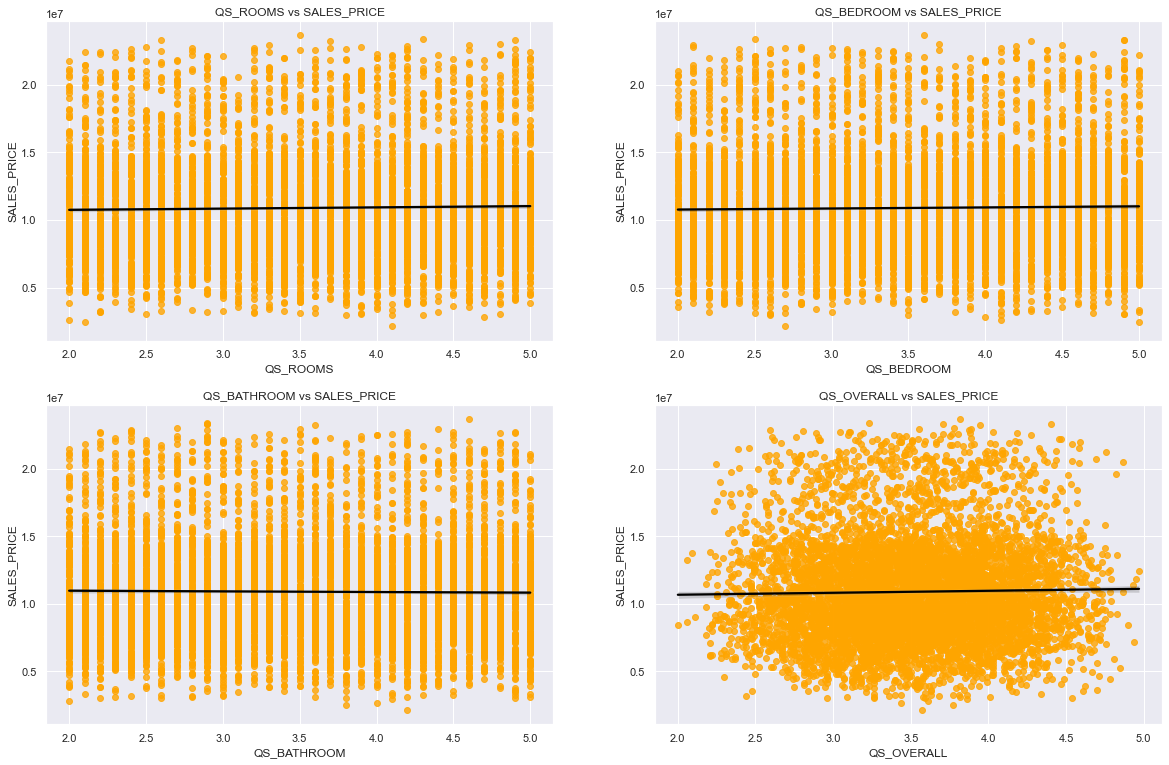

In [602]:
# Scatter plot between QS vs Sales price
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.regplot(x=df.QS_ROOMS, y=df.SALES_PRICE, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('QS_ROOMS vs SALES_PRICE')

plt.subplot(322)
sns.regplot(x=df.QS_BEDROOM, y=df.SALES_PRICE, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('QS_BEDROOM vs SALES_PRICE')

plt.subplot(323)
sns.regplot(x=df.QS_BATHROOM, y=df.SALES_PRICE, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('QS_BATHROOM vs SALES_PRICE')

plt.subplot(324)
sns.regplot(x=df.QS_OVERALL, y=df.SALES_PRICE, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('QS_OVERALL vs SALES_PRICE')

plt.show()

#### Observation
-----------------
1. Correlation of QS_OVERALL, QS_ROOMS, QS_BATHROOM, QS_BEDROOM w.r.t. SALES_PRICE is less than 5%.
2. Regression line is flat, meaning to relation between features. Whatever be the quality score of room, bedroom, bathroo, or overall, it doesn't affect the price of the house.
3. These features can be removed.

### 4.2.3 DIST_MAINROAD

In [603]:
# Correlation values
print('Correlation in (%): ')
(df.corr()['DIST_MAINROAD'].sort_values(ascending=False))*100
# Columns which have less than 5% correlation with SALES_PRICE is not necessary for predicting SALES_PRICE

Correlation in (%): 


DIST_MAINROAD    100.000000
SALES_PRICE        1.878341
REG_FEE            1.160008
COMMIS             1.099427
N_ROOM             0.230111
QS_ROOMS           0.223657
INT_SQFT           0.202236
N_BATHROOM         0.185031
QS_BEDROOM         0.155413
N_BEDROOM         -0.272349
HOUSE_AGE         -0.317650
QS_OVERALL        -1.731335
QS_BATHROOM       -2.946799
Name: DIST_MAINROAD, dtype: float64

Text(0.5, 1.0, 'DIST_MAINROAD vs SALES_PRICE')

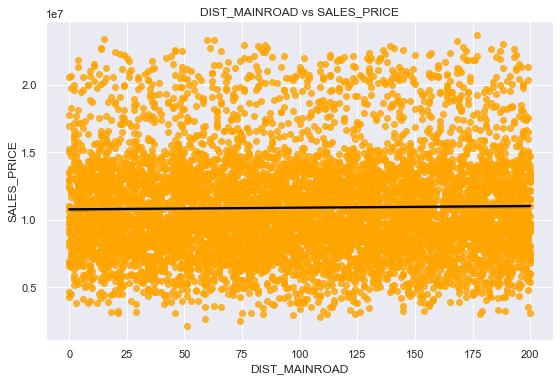

In [604]:
# Scatter plot between QS vs Sales price
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.regplot(x=df.DIST_MAINROAD, y=df.SALES_PRICE, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('DIST_MAINROAD vs SALES_PRICE')

#### Observation
--------------------
1. Correlation value of DIST_MAINROAD with other 12 feature is below 5%.
2. Regression line is flat meaning, the relation between two feature is almost non-existent. Line tells us that whatever be the distance from main road, the price won't change.
3. From DIST_MAINROAD & SALES_PRICE, we see for one particular sales price, we get houses with distance from road ranging from 0 km to 200 km. This data doesn't provide meaningful insight to predict sales price.
4. This feature can be removed.

### 4.2.4 REG_FEE & COMMIS

In [605]:
# Correlation value
print('Correlation in (%): ')
(df.corr()[['REG_FEE', 'COMMIS']])*100
# Columns which have less than 5% correlation with SALES_PRICE is not necessary for predicting SALES_PRICE

Correlation in (%): 


,REG_FEE,COMMIS
INT_SQFT,65.754388,57.107552
DIST_MAINROAD,1.160008,1.099427
N_BEDROOM,45.538017,43.044624
N_BATHROOM,26.024382,25.672581
N_ROOM,63.093152,53.334277
QS_ROOMS,1.973931,0.937657
QS_BATHROOM,-0.671898,-0.047088
QS_BEDROOM,2.152551,2.011848
QS_OVERALL,2.248230,1.700409
REG_FEE,100.000000,65.990338


#### Observation
-------------------
1. Although REG_FEE & COMMIS are descent correlation with other factors, but in practical sense, they are counted important after deciding the price of the house / property.
2. So, practically these feature doesn't affect sales price of house.
3. These features can be removed.

### 4.2.5 N_ROOM

In [606]:
# Correlation value  w.r.t. SALES_PRICE
print('Correlation in (%): ')
(df.corr()[['INT_SQFT', 'N_ROOM']])*100 # N_ROOM correlation with INT_SQFT
# Columns which have greater than 95% correlation is not necessary for predicting SALES_PRICE

Correlation in (%): 


,INT_SQFT,N_ROOM
INT_SQFT,100.000000,95.127865
DIST_MAINROAD,0.202236,0.230111
N_BEDROOM,78.626287,84.020889
N_BATHROOM,51.529005,56.854133
N_ROOM,95.127865,100.000000
QS_ROOMS,1.984954,1.652362
QS_BATHROOM,-0.833709,-0.754469
QS_BEDROOM,0.886512,1.507196
QS_OVERALL,1.402513,1.545870
REG_FEE,65.754388,63.093152


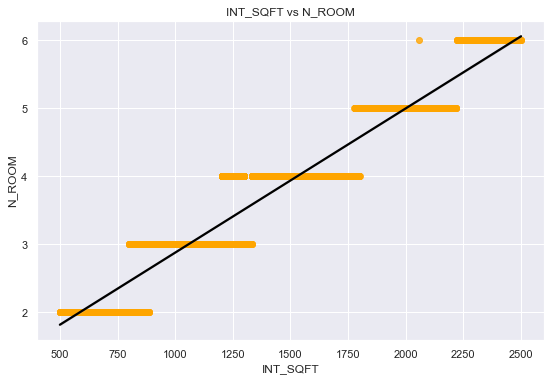

In [607]:
# Scatter plot between N_ROOM VS INT_SQFT
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.regplot(x=df.INT_SQFT, y=df.N_ROOM, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('INT_SQFT vs N_ROOM')
plt.show()

#### Observation
-----------------
1. Correlation between INT_SQFT & N_ROOM is over 95%.
2. Regression line shows they are linear, thus any one feature can be used as choosing one column will reduce the computational time and efficency, also doesn't change the result.
3. INT_SQFT correlation with SALES_PRICE is 1% higher than N_ROOM. So, we choose to remove N_ROOM.

## 4.3 Encoding
------------------
> Final Encoding will be applied after EDA, as we need df as such for analysis.

In [608]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,05-04-11,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,Anna Nagar,1986,19-12-06,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,Adyar,909,02-04-12,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,Velachery,1855,13-03-10,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,Karapakkam,1226,10-05-09,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29


### 4.3.1 Ordinal Encoding

In [609]:
# ORDINAL ENCODING for AREA, SALE_COND, UTILITY_AVAIL, STREET, MZZONE, PARK_FACILcolumns
def ordinal_encode(df):
    df.AREA.replace({
                                'Karapakkam' : 1,
                                'Adyar' : 2,
                                'Chrompet' : 3,
                                'Velachery' : 4,
                                'KK Nagar' : 5,
                                'Anna Nagar' : 6,
                                'T Nagar' : 7
    }, inplace=True)
    df.AREA = df.AREA.astype(int)
    df.SALE_COND.replace({
                                'Partial' : 1,
                                'Family' : 2,
                                'AbNormal' : 3,
                                'Normal Sale' : 4,
                                'Adj Land' : 5
    }, inplace=True)
    df.SALE_COND = df.SALE_COND.astype(int)
    df.PARK_FACIL.replace({
                                'No' : 1,
                                'Yes' : 2
    }, inplace=True)
    df.PARK_FACIL = df.PARK_FACIL.astype(int)
    df.UTILITY_AVAIL.replace({
                                'ELO' : 1,
                                'NoSeWa' : 2,
                                'NoSewr' : 3,
                                'AllPub' : 4
    }, inplace=True)
    df.UTILITY_AVAIL = df.UTILITY_AVAIL.astype(int)
    df.STREET.replace({
                                'No Access' : 1,
                                'Paved' : 2,
                                'Gravel' : 3
    }, inplace=True)
    df.STREET = df.STREET.astype(int)
    df.MZZONE.replace({
                                'A' : 1,
                                'C' : 2,
                                'I' : 3,
                                'RH' : 4,
                                'RL' : 5,
                                'RM' : 6
    }, inplace=True)
    df.MZZONE = df.MZZONE.astype(int)

### 4.3.2 Nominal Encoding

In [610]:
# Nominal Encoding for BUILD_TYPE using One-Hot Encoding
def nominal_encode(df):
    df = pd.get_dummies(df, columns=['BUILDTYPE'])
    df.BUILDTYPE_Commercial = df.BUILDTYPE_Commercial.astype('int')
    df.BUILDTYPE_House = df.BUILDTYPE_House.astype('int')
    df.BUILDTYPE_Others = df.BUILDTYPE_Others.astype('int')
    return df

## 4.4 Feature Selection

In [611]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,05-04-11,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,Anna Nagar,1986,19-12-06,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,Adyar,909,02-04-12,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,Velachery,1855,13-03-10,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,Karapakkam,1226,10-05-09,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29


In [612]:
df.shape # Original df have 22 columns

(7109, 22)

In [613]:
# Deep copying df to df1, then apply encoding to find important features, so as to finalize the columns to drop
df1 = df.copy()
# Encode first
ordinal_encode(df1)
df1 = nominal_encode(df1)
df1.drop(columns=['DATE_SALE', 'DATE_BUILD'], inplace=True)
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,3,2,4,2,1,4.0,3.9,4.9,4.330,380000,144400,7600000,43,1,0,0
1,6,1986,26,2,1,5,3,1,4,3,4,4.9,4.2,2.5,3.765,760122,304049,21717770,10,1,0,0
2,2,909,70,1,1,3,3,2,1,3,5,4.1,3.8,2.2,3.090,421094,92114,13159200,19,1,0,0
3,4,1855,14,3,2,5,2,1,3,2,3,4.7,3.9,3.6,4.010,356321,77042,9630290,21,0,0,1
4,1,1226,84,1,1,3,3,2,4,3,2,3.0,2.5,4.1,3.290,237000,74063,7406250,29,0,0,1


In [614]:
new_order = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'HOUSE_AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'SALES_PRICE']
df1 = df1.reindex(columns=new_order)
df1.columns
# We need the SALES_PRICE column at the end for fitting independent & dependent features

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'HOUSE_AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'SALES_PRICE'],
      dtype='object')

In [615]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int32  
 1   INT_SQFT              7109 non-null   int64  
 2   DIST_MAINROAD         7109 non-null   int64  
 3   N_BEDROOM             7109 non-null   int32  
 4   N_BATHROOM            7109 non-null   int32  
 5   N_ROOM                7109 non-null   int64  
 6   SALE_COND             7109 non-null   int32  
 7   PARK_FACIL            7109 non-null   int32  
 8   UTILITY_AVAIL         7109 non-null   int32  
 9   STREET                7109 non-null   int32  
 10  MZZONE                7109 non-null   int32  
 11  QS_ROOMS              7109 non-null   float64
 12  QS_BATHROOM           7109 non-null   float64
 13  QS_BEDROOM            7109 non-null   float64
 14  QS_OVERALL            7061 non-null   float64
 15  REG_FEE              

In [616]:
# QS_OVERALL has NaN values, just filling it with mode
df1['QS_OVERALL'].fillna(df['QS_OVERALL'].mode()[0], inplace=True)
df1.QS_OVERALL.isna().sum()

0

In [617]:
# QS_OVERALL change datatype to int
df1['QS_OVERALL'] = df1['QS_OVERALL'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int32  
 1   INT_SQFT              7109 non-null   int64  
 2   DIST_MAINROAD         7109 non-null   int64  
 3   N_BEDROOM             7109 non-null   int32  
 4   N_BATHROOM            7109 non-null   int32  
 5   N_ROOM                7109 non-null   int64  
 6   SALE_COND             7109 non-null   int32  
 7   PARK_FACIL            7109 non-null   int32  
 8   UTILITY_AVAIL         7109 non-null   int32  
 9   STREET                7109 non-null   int32  
 10  MZZONE                7109 non-null   int32  
 11  QS_ROOMS              7109 non-null   float64
 12  QS_BATHROOM           7109 non-null   float64
 13  QS_BEDROOM            7109 non-null   float64
 14  QS_OVERALL            7109 non-null   int32  
 15  REG_FEE              

In [618]:
# Separating dependent & independent features
X = df1.drop('SALES_PRICE', axis=1)
Y = df1.SALES_PRICE
dep_feature = df1.columns[:-1]

# From this algorithm, we choose top 13 features of 22
KBest = SelectKBest(chi2, k=13).fit(X, Y)
feature_bool = KBest.get_support()

best_features = []
for i in range(len(dep_feature)):
    if feature_bool[i] == True:
        best_features.append(dep_feature[i])

print('Top featurs are: ', best_features) # Important features

Top featurs are:  ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'SALE_COND', 'UTILITY_AVAIL', 'MZZONE', 'REG_FEE', 'COMMIS', 'HOUSE_AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others']


### Observation
---------------
1. After analyzing through correlation graphs, regression line, feature selection and pratical aspects, we proceed to drop QS_OVERALL, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, 'DATE_SALE', 'DATE_BUILD', 'DIST_MAINROAD', 'COMMIS', 'REG_FEE', 'N_ROOM'.

## 4.5 Dropping columns

In [619]:
# Drop unnecessary columns QS_OVERALL, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, 'DATE_SALE', 'DATE_BUILD', 'DIST_MAINROAD', 'COMMIS', 'REG_FEE', 'N_ROOM'
df.drop(columns=[ 'QS_OVERALL', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 
                 'DATE_SALE', 'DATE_BUILD', 'DIST_MAINROAD', 'COMMIS', 'REG_FEE', 'N_ROOM'], inplace=True)
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,1,1,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,2,1,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,1,1,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,3,2,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,1,1,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29


In [620]:
df.shape
# Columns reduced

(7109, 12)

## 4.6 Outliers

In [621]:
# Analyse for Outliers in Continous feature data
df[['INT_SQFT', 'HOUSE_AGE', 'SALES_PRICE']].describe()

,INT_SQFT,HOUSE_AGE,SALES_PRICE
count,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,23.550710,1.089491e+07
std,457.410902,12.435546,3.768603e+06
min,500.000000,3.000000,2.156875e+06
25%,993.000000,13.000000,8.272100e+06
50%,1373.000000,23.000000,1.033505e+07
75%,1744.000000,33.000000,1.299390e+07
max,2500.000000,55.000000,2.366734e+07


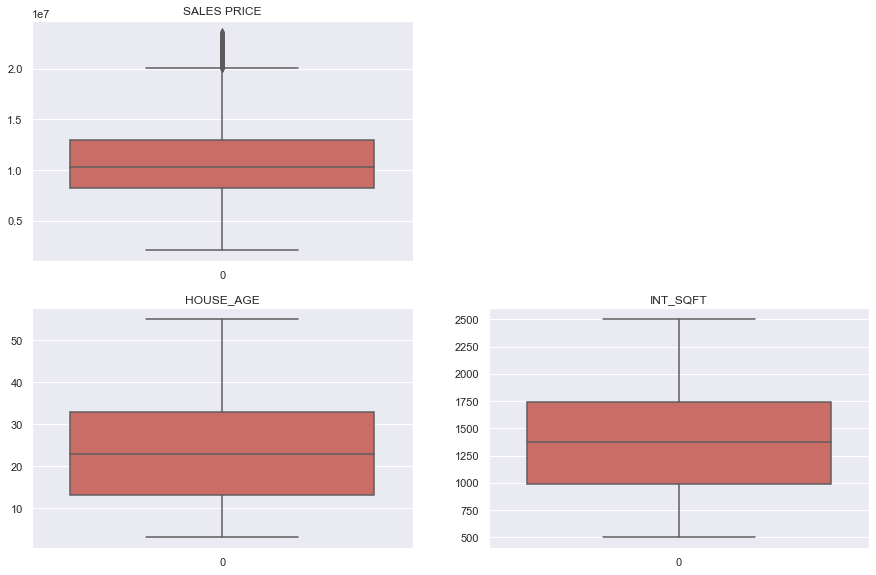

In [622]:
plt.figure(figsize=(15, 15))
plt.subplot(321)
sns.boxplot(data=df.loc[:, 'SALES_PRICE'])
plt.title('SALES PRICE')


plt.subplot(324)
sns.boxplot(data=df.loc[:, 'INT_SQFT'])
plt.title('INT_SQFT')


plt.subplot(323)
sns.boxplot(data=df.loc[:, 'HOUSE_AGE'])
plt.title('HOUSE_AGE')

plt.show()

In [623]:
# Using Z-Score remove outliers which falls over 3 STD from SALES_PRICE
z = np.abs(stats.zscore(df.SALES_PRICE))
df = df[(z<3) & (z>-3)]
df.shape # 37 rows removed

(7072, 12)

In [624]:
df[['INT_SQFT', 'HOUSE_AGE', 'SALES_PRICE']].describe()

,INT_SQFT,HOUSE_AGE,SALES_PRICE
count,7072.000000,7072.000000,7.072000e+03
mean,1379.177602,23.581872,1.083325e+07
std,456.832732,12.431914,3.680431e+06
min,500.000000,3.000000,2.156875e+06
25%,991.000000,13.000000,8.265360e+06
50%,1365.500000,23.000000,1.030442e+07
75%,1739.000000,33.000000,1.294485e+07
max,2500.000000,55.000000,2.219991e+07


## Observation
---------------
1. Created new column HOUSE_AGE to know how age of building affect the price.
2. No outliers in HOUSE_AGE, INT_SQFT columns
3. SALES_PRICE have outliers, some of the houses may be super luxurious, we don't want such property values to influence the price of regular houses. So, we remove outliers using z-score. (37 rows were removed)
4. Max. Sale price changed from 2.36 Cr. to 2.22 Cr.
5. Encoding will be done after EDA.

# 5. EXPLORATORY DATA ANALYSIS

## 5.1 Categorical Feature Analysis

In [625]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,1,1,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,2,1,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,1,1,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,3,2,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,1,1,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29


### 5.1.1 AREA

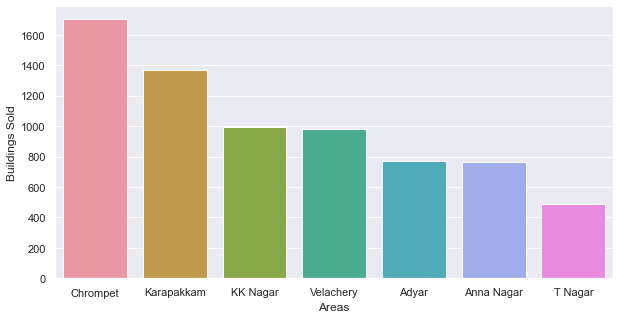

In [626]:
# Plot the popular area in Chennai (descending order) sales wise
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
plt.figure(figsize=(10, 5))
sns.barplot(y = df.AREA.value_counts(), x = df.AREA.value_counts().index)
plt.ylabel('Buildings Sold')
plt.xlabel('Areas')
plt.show()

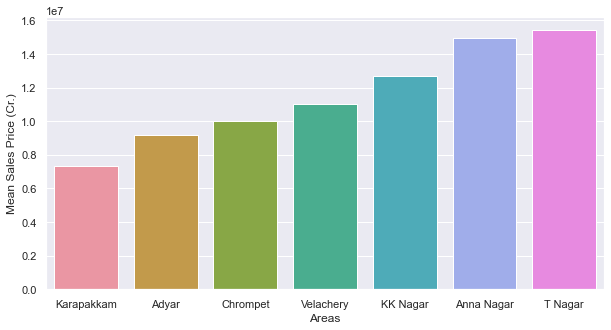

In [627]:
# Plot areas w.r.t Sales price (ascending order)
plt.figure(figsize=(10, 5))
Area_SaleP = df.groupby('AREA')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = Area_SaleP['SALES_PRICE'], x = Area_SaleP['AREA'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Areas')
plt.show()

##### Observation
-------------------
1. House Sales in T-Nagar & Anna Nagar are less, reason is mostly due to very high selling price, which is due to T Nagar being main area in Chennai, and may be the no. of houses sold are very less than the average.
2. Karapakkam and Chrompet houses are sold more due to less price.
3. Adyar, Velachery and KK Nagar houses are average performing assests.
4. Ordinal encoding can be applied.

### 5.1.2  N_BEDROOM & N_BATHROOM

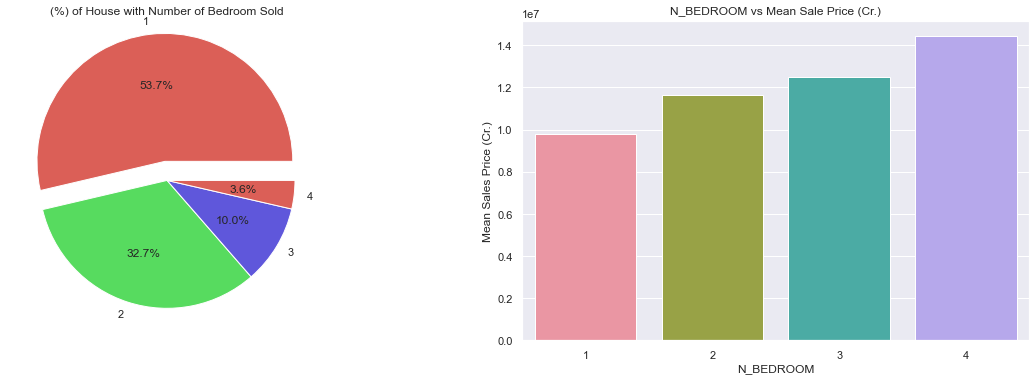

In [628]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.15, 0, 0, 0)
plt.pie(df.N_BEDROOM.value_counts(), labels=df.N_BEDROOM.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('(%) of House with Number of Bedroom Sold')

plt.subplot(322)
NBED_SaleP = df.groupby('N_BEDROOM')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = NBED_SaleP['SALES_PRICE'], x = NBED_SaleP['N_BEDROOM'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('N_BEDROOM')
plt.title('N_BEDROOM vs Mean Sale Price (Cr.)')

plt.show()

<Figure size 1440x360 with 0 Axes>

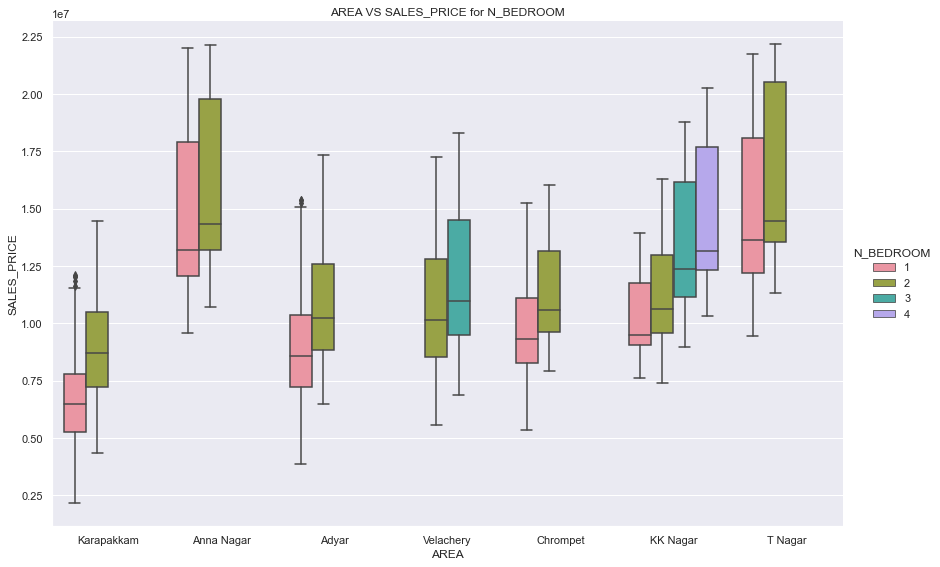

In [629]:
plt.figure(figsize=(20, 5))
sns.catplot(data=df, x='AREA', y='SALES_PRICE', hue='N_BEDROOM', kind='box',
            height=8, aspect=1.5)
plt.title('AREA VS SALES_PRICE for N_BEDROOM')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

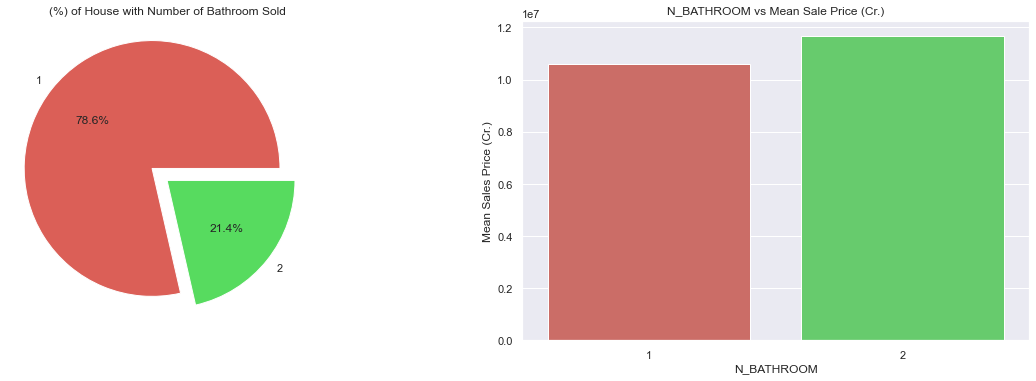

In [630]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.15, 0)
plt.pie(df.N_BATHROOM.value_counts(), labels=df.N_BATHROOM.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('(%) of House with Number of Bathroom Sold')

plt.subplot(322)
NBath_SaleP = df.groupby('N_BATHROOM')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = NBath_SaleP['SALES_PRICE'], x = NBath_SaleP['N_BATHROOM'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('N_BATHROOM')
plt.title('N_BATHROOM vs Mean Sale Price (Cr.)')

plt.show()

<Figure size 1440x360 with 0 Axes>

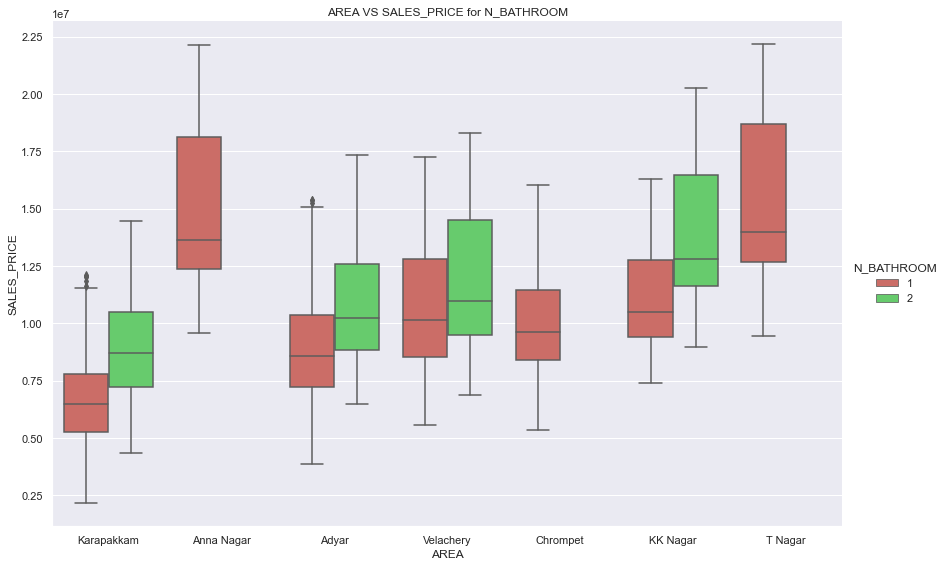

In [631]:
plt.figure(figsize=(20, 5))
sns.catplot(data=df, x='AREA', y='SALES_PRICE', hue='N_BATHROOM', kind='box',
            height=8, aspect=1.5)
plt.title('AREA VS SALES_PRICE for N_BATHROOM')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

##### Observation
----------------
1. 53.4% houses sold were with Single bedroom.
2. 78.7% houses sold were with Single bathroom due to their least mean sales price.
3. 2 bedroom buildings in Anna Nagar & T Nagar are more costlier than 4 bedroom buildings in KK Nagar.
4. 2 bedroom buildings in Karapakkam are the cheapest.
5. Velachery & KK Nagar are only places were 3 bedroom buildings are available.
6. Anna Nagar & T Nagar have only 1 bathroom buildings that too with highest sales price.
7. Karapakkam & Adyar are the cheaper place to avail 1 bathroom buildings.


### 5.1.3 SALE_COND

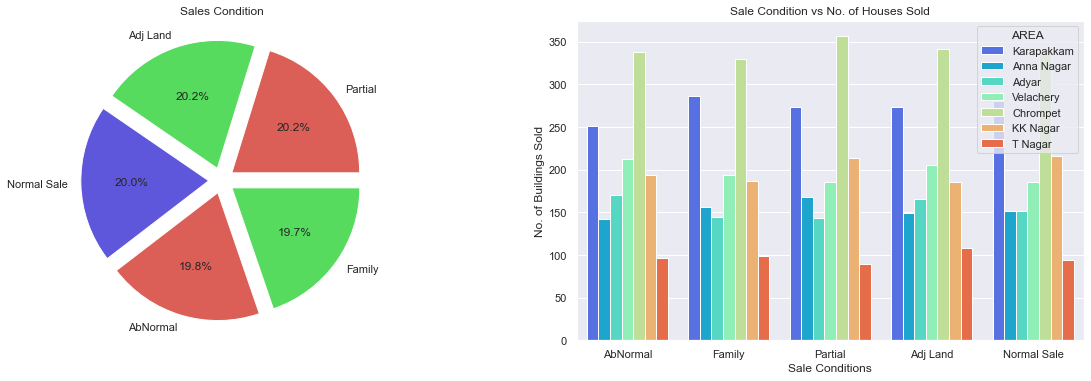

In [632]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(df.SALE_COND.value_counts(), labels=df.SALE_COND.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Sales Condition')

plt.subplot(322)
sns.countpot(x='SALE_COND', hue='AREA', data=df, palette='rainbow')
plt.ylabel('No. of Buildings Sold')
plt.xlabel('Sale Conditions')
plt.title('Sale Condition vs No. of Houses Sold')

plt.show()

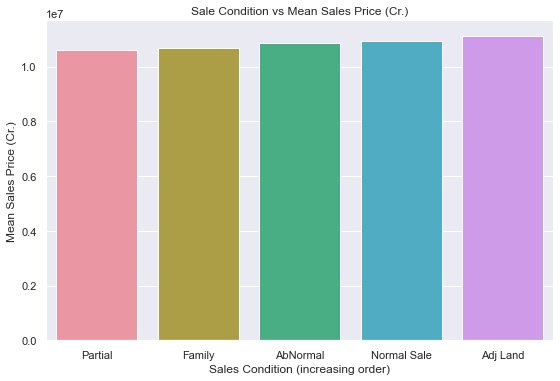

In [633]:
# Plot the popular area in Chennai (descending order) sales wise
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
plt.figure(figsize=(20, 20))
# plt.subplot(321)
# # sns.barplot(y = df.SALE_COND.value_counts(), x = df.SALE_COND.value_counts().index)
# sns.countplot(x='SALE_COND', hue='AREA', data=df, palette='rainbow')
# plt.ylabel('No. of Buildings Sold')
# plt.xlabel('Sale Conditions')
# plt.title('Sale Condition vs No. of Houses Sold')

plt.subplot(322)
SaleC_SaleP = df.groupby('SALE_COND')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = SaleC_SaleP['SALES_PRICE'], x = SaleC_SaleP['SALE_COND'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Sales Condition (increasing order)')
plt.title('Sale Condition vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
-----------------
1. From pie & bar chart, adjoining land (Adj Land) & Partial conditions houses were sold most.
2. Adj Land houses were the costiest and Partial condition houses were cheapest comparitevely.
3. Ordinal encoding can be applied.

### 5.1.4 PARK_FACIL

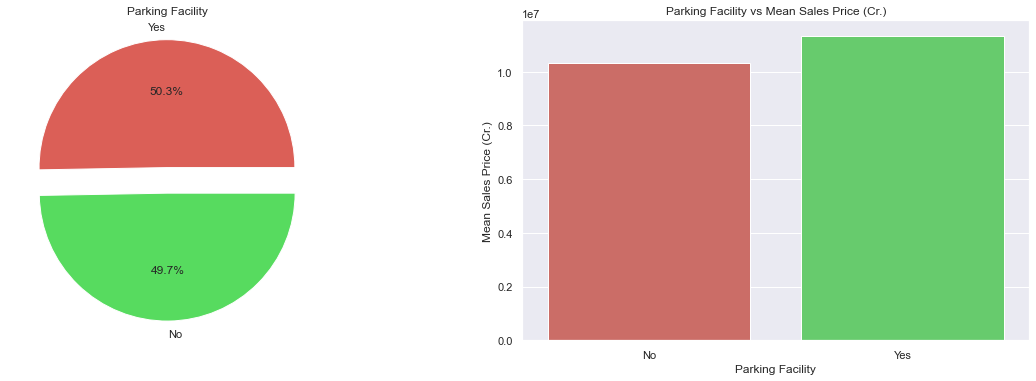

In [634]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1)
plt.pie(df.PARK_FACIL.value_counts(), labels=df.PARK_FACIL.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Parking Facility')

plt.subplot(322)
Park_SaleP = df.groupby('PARK_FACIL')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = Park_SaleP['SALES_PRICE'], x = Park_SaleP['PARK_FACIL'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Parking Facility')
plt.title('Parking Facility vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
------------------
1. Houses with parking facilities were sold 50.5% which eventually had higher mean sales price.
2. Ordinal encoding can be applied.

### 5.1.5 BUILDTYPE

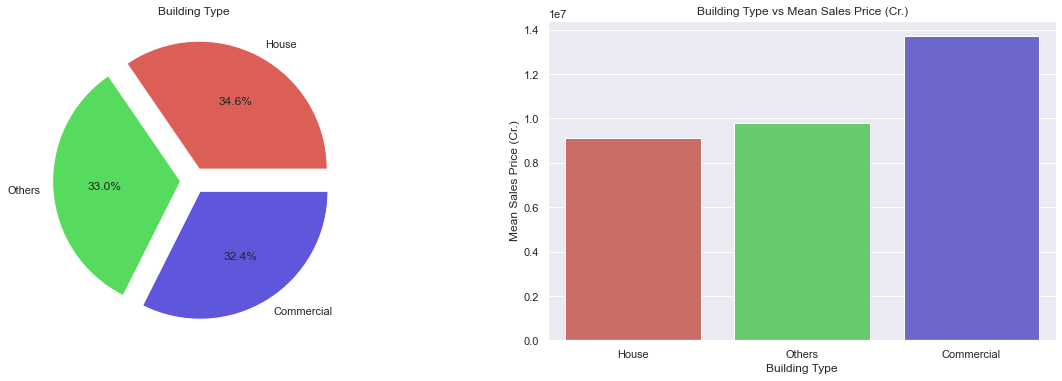

In [635]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1, 0.1)
plt.pie(df.BUILDTYPE.value_counts(), labels=df.BUILDTYPE.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Building Type')

plt.subplot(322)
BuildT_SaleP = df.groupby('BUILDTYPE')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = BuildT_SaleP['SALES_PRICE'], x = BuildT_SaleP['BUILDTYPE'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Building Type')
plt.title('Building Type vs Mean Sales Price (Cr.)')

plt.show()

In [636]:
fig = plx.scatter(df, x="INT_SQFT", y="SALES_PRICE", color="BUILDTYPE")
fig.show()

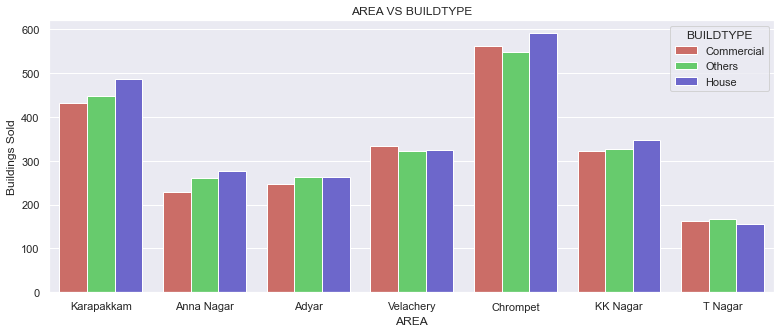

In [637]:
plt.figure(figsize=(13, 5))
sns.countplot(x='AREA', hue='BUILDTYPE', data=df)
plt.title('AREA VS BUILDTYPE')
plt.xlabel('AREA')
plt.ylabel('Buildings Sold')
plt.show()

<Figure size 1440x360 with 0 Axes>

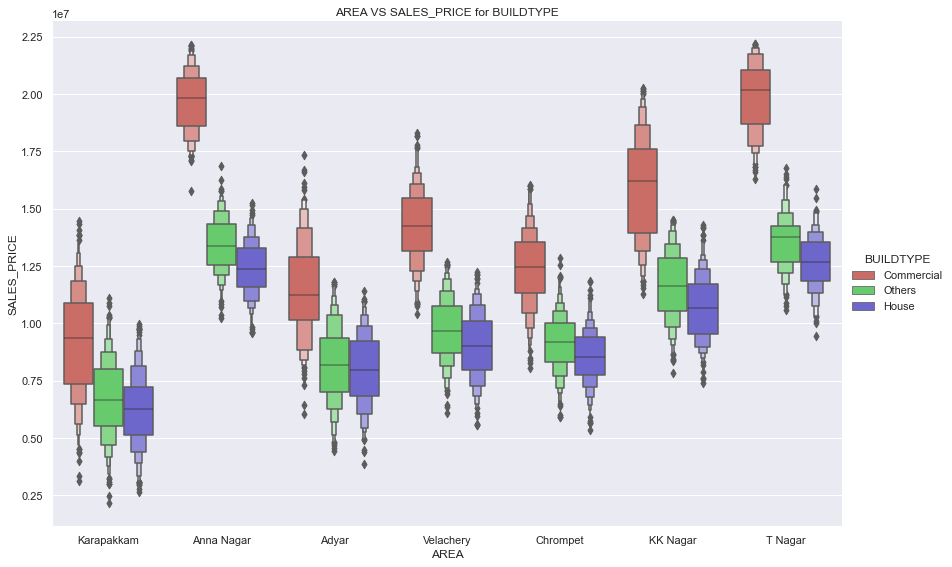

In [638]:
plt.figure(figsize=(20, 5))
sns.catplot(data=df, x='AREA', y='SALES_PRICE', hue='BUILDTYPE', kind='boxen',
            height=8, aspect=1.5)
plt.title('AREA VS SALES_PRICE for BUILDTYPE')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

##### Observation
---------------------
1. Most sold (34.4%) building type were Houses in all areas, reason being cheaper compared to other.
2. Commerical Building are the costliest. Commerical buildings in Anna Nagar & KK Nagar has highest sales price with least sales count.
3. House buildings in Karapakkam & Chrompet are cheapest and have very high sales count.
3. Nominal encoding can be applied.

### 5.1.6 UTILITY_AVAIL

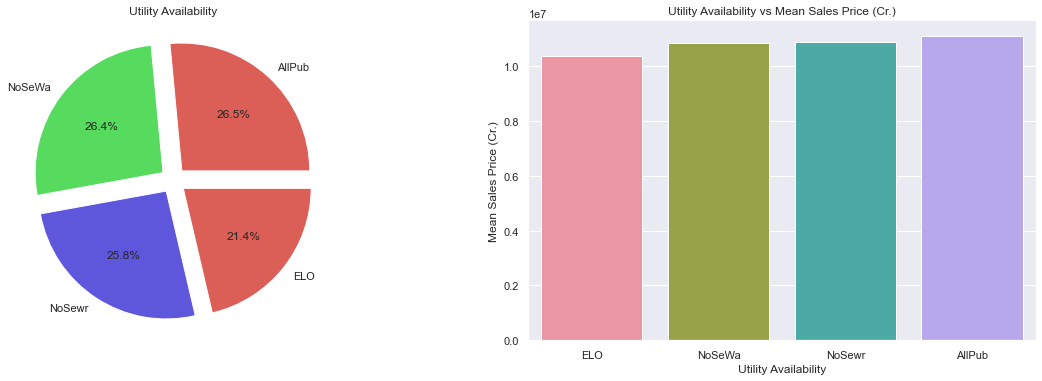

In [639]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1, 0.1, 0.1)
plt.pie(df.UTILITY_AVAIL.value_counts(), labels=df.UTILITY_AVAIL.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Utility Availability')

plt.subplot(322)
UtilityA_SaleP = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = UtilityA_SaleP['SALES_PRICE'], x = UtilityA_SaleP['UTILITY_AVAIL'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Utility Availability')
plt.title('Utility Availability vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
---------------
1. Houses with All Public Utilities (AllPub) (Electricity, Gas, Water & Septic tank) were sold most eventhough they are the costliest properties.
2. Ordinal encoding can be applied.

### 5.1.7 STREET

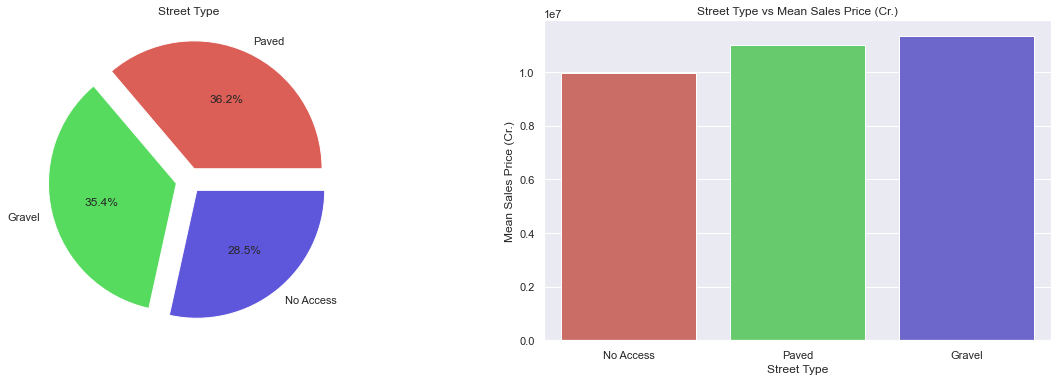

In [640]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1, 0.1)
plt.pie(df.STREET.value_counts(), labels=df.STREET.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Street Type')

plt.subplot(322)
Street_SaleP = df.groupby('STREET')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = Street_SaleP['SALES_PRICE'], x = Street_SaleP['STREET'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Street Type')
plt.title('Street Type vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
-----------------
1. Paved street type were sold most (36.2%) and they have average mean sales price.
2. Ordinal encoding can be applied.

### 5.1.8 MZZONE

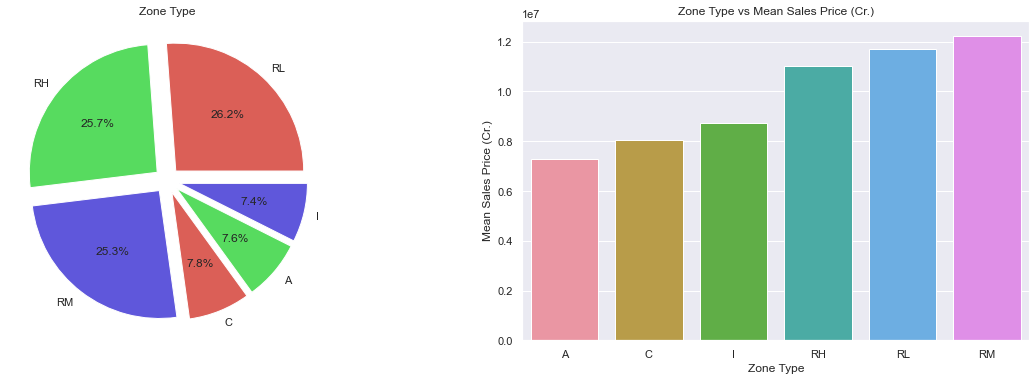

In [641]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
e = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(df.MZZONE.value_counts(), labels=df.MZZONE.value_counts().index, autopct='%1.1f%%', explode=e)
plt.title('Zone Type')

plt.subplot(322)
Zone_SaleP = df.groupby('MZZONE')['SALES_PRICE'].aggregate(np.mean).reset_index().sort_values('SALES_PRICE')
sns.barplot(y = Zone_SaleP['SALES_PRICE'], x = Zone_SaleP['MZZONE'])
plt.ylabel('Mean Sales Price (Cr.)')
plt.xlabel('Zone Type')
plt.title('Zone Type vs Mean Sales Price (Cr.)')

plt.show()

##### Observation
-------------
1. Residential low density zone houses (26.1%) were sold most.
2. Residential medium density zone houses are the costliest.
3. Ordinal encoding can be applied.

## 5.2 Continous Feature Analysis

### 5.2.1 SALES_PRICE

In [642]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE    1.000000
INT_SQFT       0.610455
N_BEDROOM      0.332943
N_BATHROOM     0.120560
HOUSE_AGE     -0.114632
Name: SALES_PRICE, dtype: float64

In [643]:
df['SALES_PRICE'].describe()

count    7.072000e+03
mean     1.083325e+07
std      3.680431e+06
min      2.156875e+06
25%      8.265360e+06
50%      1.030442e+07
75%      1.294485e+07
max      2.219991e+07
Name: SALES_PRICE, dtype: float64

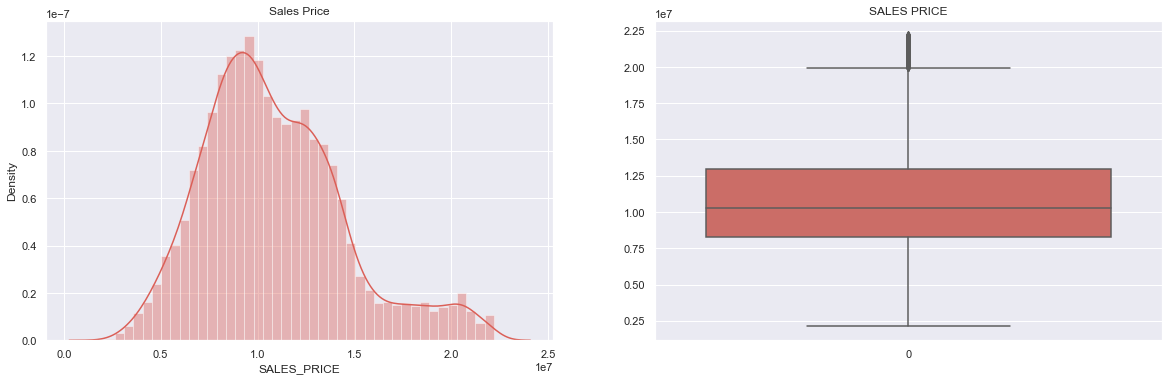

In [644]:
plt.figure(figsize=(20, 20)) # most data are b/w 50L to 1.5C
plt.subplot(321)
sns.distplot(df.SALES_PRICE, hist=True)
plt.title('Sales Price')

plt.subplot(322)
sns.boxplot(data=df.loc[:, 'SALES_PRICE'])
plt.title('SALES PRICE')
plt.show()

##### Observation
--------------------
1. Data seems to follow Normal Distribution so Standardization can be applied for Linear Regression Model.
2. Mean sales price is 1.08 Cr.
3. Most houses sold were between 50L to 1.5Cr.

### 5.2.2 INT_SQFT

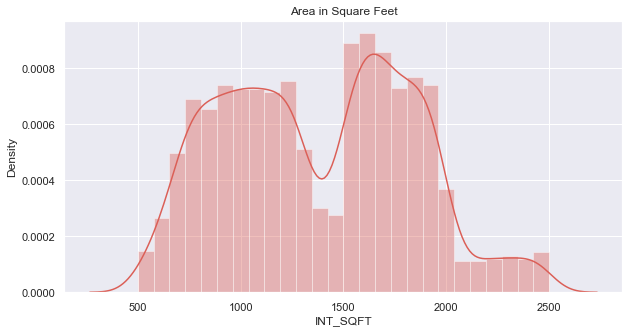

In [645]:
plt.figure(figsize=(10, 5))
sns.distplot(df.INT_SQFT, hist=True)
plt.title('Area in Square Feet')
plt.show()

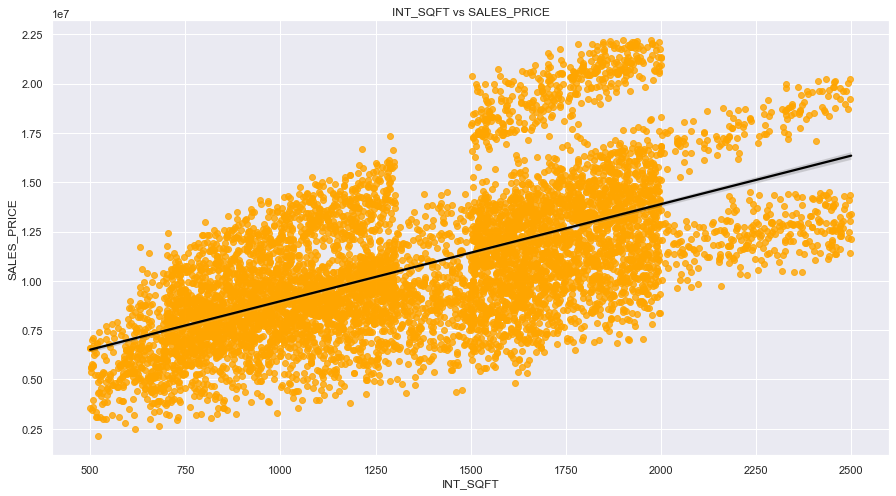

In [646]:
# Area in SqFt vs Sales price
plt.figure(figsize=(15, 8))
sns.regplot(x=df.INT_SQFT, y=df.SALES_PRICE, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('INT_SQFT vs SALES_PRICE')
plt.show()

In [675]:
df_COMM = df[df.BUILDTYPE == 'Commercial']
df_OTH = df[df.BUILDTYPE == 'Others']
df_HOU = df[df.BUILDTYPE == 'House']

# Commerical Buildings
fig_1 = go.Figure()
fig_1.add_trace(go.Scatter(
                        x = df_COMM.INT_SQFT.where(df_COMM.AREA == 'Karapakkam'),
                        y = df_COMM.SALES_PRICE.where(df_COMM.AREA == 'Karapakkam'),
                        name = 'Karapakkam',
                        mode = 'markers'
))
fig_1.add_trace(go.Scatter(
                        x = df_COMM.INT_SQFT.where(df_COMM.AREA == 'Anna Nagar'),
                        y = df_COMM.SALES_PRICE.where(df_COMM.AREA == 'Anna Nagar'),
                        name = 'Anna Nagar',
                        mode = 'markers'
))
fig_1.add_trace(go.Scatter(
                        x = df_COMM.INT_SQFT.where(df_COMM.AREA == 'Adyar'),
                        y = df_COMM.SALES_PRICE.where(df_COMM.AREA == 'Adyar'),
                        name = 'Adyar',
                        mode = 'markers'
))
fig_1.add_trace(go.Scatter(
                        x = df_COMM.INT_SQFT.where(df_COMM.AREA == 'Velachery'),
                        y = df_COMM.SALES_PRICE.where(df_COMM.AREA == 'Velachery'),
                        name = 'Velachery',
                        mode = 'markers'
))
fig_1.add_trace(go.Scatter(
                        x = df_COMM.INT_SQFT.where(df_COMM.AREA == 'Chrompet'),
                        y = df_COMM.SALES_PRICE.where(df_COMM.AREA == 'Chrompet'),
                        name = 'Chrompet',
                        mode = 'markers'
))
fig_1.add_trace(go.Scatter(
                        x = df_COMM.INT_SQFT.where(df_COMM.AREA == 'KK Nagar'),
                        y = df_COMM.SALES_PRICE.where(df_COMM.AREA == 'KK Nagar'),
                        name = 'KK Nagar',
                        mode = 'markers'
))
fig_1.add_trace(go.Scatter(
                        x = df_COMM.INT_SQFT.where(df_COMM.AREA == 'T Nagar'),
                        y = df_COMM.SALES_PRICE.where(df_COMM.AREA == 'T Nagar'),
                        name = 'T Nagar',
                        mode = 'markers'
))

fig_1.update_layout(
            title_text = "SALE_PRICE vs INT_SQFT for diff. Area's with Commercial Buildtype",
            legend_title = 'AREA',
            xaxis_title = 'INT_SQFT',
            yaxis_title = 'SALES_PRICE'
)

# Other Building types
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(
                        x = df_OTH.INT_SQFT.where(df_OTH.AREA == 'Karapakkam'),
                        y = df_OTH.SALES_PRICE.where(df_OTH.AREA == 'Karapakkam'),
                        name = 'Karapakkam',
                        mode = 'markers'
))
fig_2.add_trace(go.Scatter(
                        x = df_OTH.INT_SQFT.where(df_OTH.AREA == 'Anna Nagar'),
                        y = df_OTH.SALES_PRICE.where(df_OTH.AREA == 'Anna Nagar'),
                        name = 'Anna Nagar',
                        mode = 'markers'
))
fig_2.add_trace(go.Scatter(
                        x = df_OTH.INT_SQFT.where(df_OTH.AREA == 'Adyar'),
                        y = df_OTH.SALES_PRICE.where(df_OTH.AREA == 'Adyar'),
                        name = 'Adyar',
                        mode = 'markers'
))
fig_2.add_trace(go.Scatter(
                        x = df_OTH.INT_SQFT.where(df_OTH.AREA == 'Velachery'),
                        y = df_OTH.SALES_PRICE.where(df_OTH.AREA == 'Velachery'),
                        name = 'Velachery',
                        mode = 'markers'
))
fig_2.add_trace(go.Scatter(
                        x = df_OTH.INT_SQFT.where(df_OTH.AREA == 'Chrompet'),
                        y = df_OTH.SALES_PRICE.where(df_OTH.AREA == 'Chrompet'),
                        name = 'Chrompet',
                        mode = 'markers'
))
fig_2.add_trace(go.Scatter(
                        x = df_OTH.INT_SQFT.where(df_OTH.AREA == 'KK Nagar'),
                        y = df_OTH.SALES_PRICE.where(df_OTH.AREA == 'KK Nagar'),
                        name = 'KK Nagar',
                        mode = 'markers'
))
fig_2.add_trace(go.Scatter(
                        x = df_OTH.INT_SQFT.where(df_OTH.AREA == 'T Nagar'),
                        y = df_OTH.SALES_PRICE.where(df_OTH.AREA == 'T Nagar'),
                        name = 'T Nagar',
                        mode = 'markers'
))

fig_2.update_layout(
            title_text = "SALE_PRICE vs INT_SQFT for diff. Area's with Other Buildtype",
            legend_title = 'AREA',
            xaxis_title = 'INT_SQFT',
            yaxis_title = 'SALES_PRICE'
)

# House Buildings
fig_3 = go.Figure()
fig_3.add_trace(go.Scatter(
                        x = df_HOU.INT_SQFT.where(df_HOU.AREA == 'Karapakkam'),
                        y = df_HOU.SALES_PRICE.where(df_HOU.AREA == 'Karapakkam'),
                        name = 'Karapakkam',
                        mode = 'markers'
))
fig_3.add_trace(go.Scatter(
                        x = df_HOU.INT_SQFT.where(df_HOU.AREA == 'Anna Nagar'),
                        y = df_HOU.SALES_PRICE.where(df_HOU.AREA == 'Anna Nagar'),
                        name = 'Anna Nagar',
                        mode = 'markers'
))
fig_3.add_trace(go.Scatter(
                        x = df_HOU.INT_SQFT.where(df_HOU.AREA == 'Adyar'),
                        y = df_HOU.SALES_PRICE.where(df_HOU.AREA == 'Adyar'),
                        name = 'Adyar',
                        mode = 'markers'
))
fig_3.add_trace(go.Scatter(
                        x = df_HOU.INT_SQFT.where(df_HOU.AREA == 'Velachery'),
                        y = df_HOU.SALES_PRICE.where(df_HOU.AREA == 'Velachery'),
                        name = 'Velachery',
                        mode = 'markers'
))
fig_3.add_trace(go.Scatter(
                        x = df_HOU.INT_SQFT.where(df_HOU.AREA == 'Chrompet'),
                        y = df_HOU.SALES_PRICE.where(df_HOU.AREA == 'Chrompet'),
                        name = 'Chrompet',
                        mode = 'markers'
))
fig_3.add_trace(go.Scatter(
                        x = df_HOU.INT_SQFT.where(df_HOU.AREA == 'KK Nagar'),
                        y = df_HOU.SALES_PRICE.where(df_HOU.AREA == 'KK Nagar'),
                        name = 'KK Nagar',
                        mode = 'markers'
))
fig_3.add_trace(go.Scatter(
                        x = df_HOU.INT_SQFT.where(df_HOU.AREA == 'T Nagar'),
                        y = df_HOU.SALES_PRICE.where(df_HOU.AREA == 'T Nagar'),
                        name = 'T Nagar',
                        mode = 'markers'
))

fig_3.update_layout(
            title_text = "SALE_PRICE vs INT_SQFT for diff. Area's with House Buildtype",
            legend_title = 'AREA',
            xaxis_title = 'INT_SQFT',
            yaxis_title = 'SALES_PRICE'
)

fig_1.show()
fig_2.show()
fig_3.show()

<Figure size 1440x360 with 0 Axes>

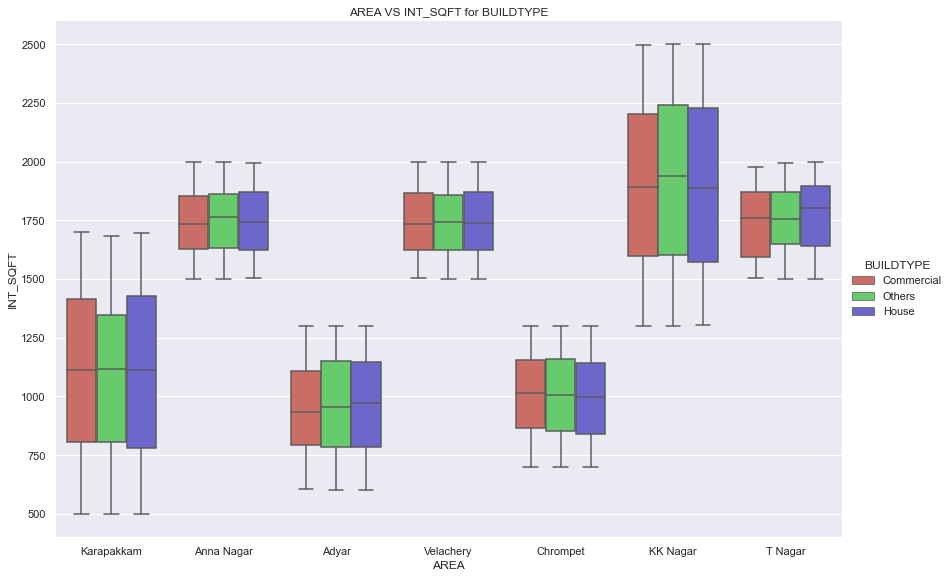

In [538]:
plt.figure(figsize=(20, 5))
sns.catplot(data=df, x='AREA', y='INT_SQFT', hue='BUILDTYPE', kind='box',
            height=8, aspect=1.5)
plt.title('AREA VS INT_SQFT for BUILDTYPE')
plt.xlabel('AREA')
plt.ylabel('INT_SQFT')
plt.show()

##### Observation
------------------
1. Area(SQFT) doesn't follow the normal distribution curve.
2. Correlation with sales price is 0.612125 (approx. 61.2%), more the area sq ft, higher the price.
3. Karapakkam has buildings with least SQFT area. While KK Nagar is the only place with large area buildings.
4. Costly places like Anna Nagar & T Nagar have average SQFT.

### 5.2.3 HOUSE_AGE

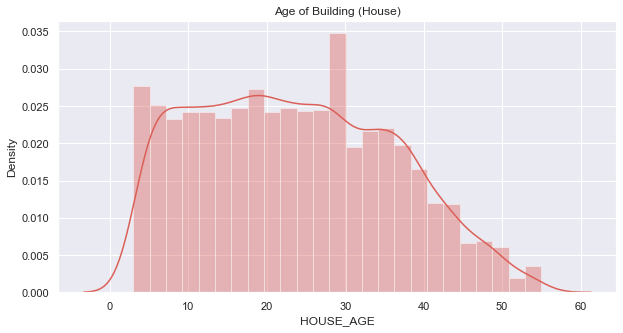

In [372]:
plt.figure(figsize=(10, 5))
sns.distplot(df.HOUSE_AGE, hist=True)
plt.title('Age of Building (House)')
plt.show()

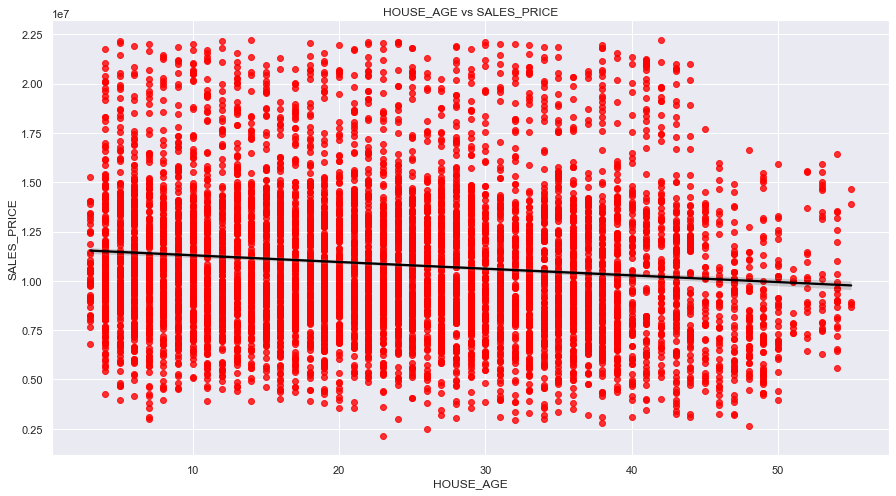

In [373]:
# Building (House) Age vs Sales price
plt.figure(figsize=(15, 8))
sns.regplot(x=df.HOUSE_AGE, y=df.SALES_PRICE, scatter_kws={'color':'red'}, line_kws={'color':'black'})
plt.title('HOUSE_AGE vs SALES_PRICE')
plt.show()

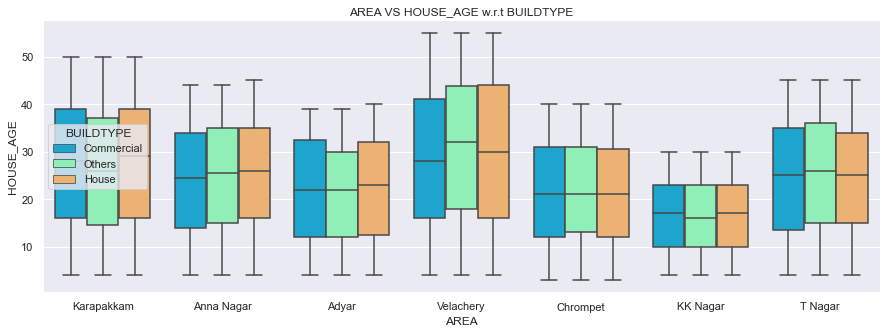

In [374]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='AREA', y='HOUSE_AGE', hue='BUILDTYPE', data=df, palette='rainbow')
plt.title('AREA VS HOUSE_AGE w.r.t BUILDTYPE')
plt.xlabel('AREA')
plt.ylabel('HOUSE_AGE')
plt.show()

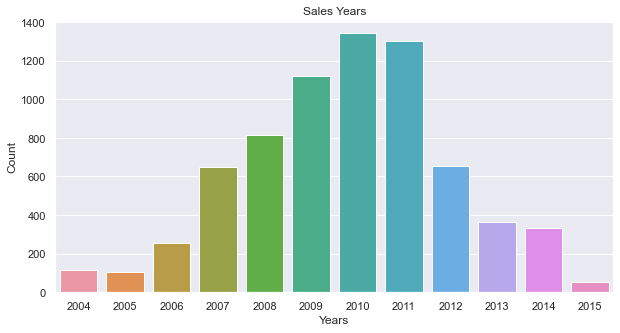

In [375]:
plt.figure(figsize=(10, 5))
sns.barplot(x=year_data.index, y='Count', data=year_data)
plt.title('Sales Years')
plt.xlabel('Years')
plt.show()

##### Observation
------------------
1. Histogram plot shows the buildings sold for upto 30 years old follow uniform distribution, it indicates that buildings which are less than 30 years old were sold equal numbers.
2. House age correlation with sales price is -0.119192 (approx. 12%), means it affect price negatively. Older the building, lesser the price.
3. Over 50 years old Velachery & Karapakkam buildings were sold. Seems people are buying Karapakkam properties as it being cheapest and Velachery being moderately priced.
4. Many buildings sold in KK Nagar were the less than 30 years old.
5. Average age of buildings sold were between 20 - 30 years old.
6. Most of the buildings were sold in Year 2010. It seems like cyclic chart.

### Encoding
> Preparing the data for ML process.

In [376]:
ordinal_encode(df)
df = nominal_encode(df)
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,2,4,2,1,7600000,43,1,0,0
1,6,1986,2,1,3,1,4,3,4,21717770,10,1,0,0
2,2,909,1,1,3,2,1,3,5,13159200,19,1,0,0
3,4,1855,3,2,2,1,3,2,3,9630290,21,0,0,1
4,1,1226,1,1,3,2,4,3,2,7406250,29,0,0,1


# 6. ML MDOELS

### Splitting Dataset

In [377]:
# Splitting features and labels
X_FEATURE = df.drop(['SALES_PRICE'], axis=1)
Y_LABEL = df.SALES_PRICE
X_train, X_test, Y_train, Y_test = train_test_split(X_FEATURE, Y_LABEL, test_size=0.3, random_state=42) # test data 30%

In [378]:
print(X_train.shape, X_test.shape)

(4950, 13) (2122, 13)


In [379]:
print(Y_train.shape, Y_test.shape)

(4950,) (2122,)


In [380]:
# Store Scoring value for each ML Algorithms
scores = []

## 6.1 Linear Regression

In [382]:
#classifier: clf_LR
reg_LR = linear_model.LinearRegression()
reg_LR.fit(X_train, Y_train) # fitting training features and labels

LinearRegression()

In [414]:
Y_predict = reg_LR.predict(X_test)
Y_predict.dtype, Y_test.dtype

(dtype('float64'), dtype('int64'))

In [415]:
# Analaysis of Coefficients
coeff_df = pd.DataFrame(reg_LR.coef_, index=['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'], columns=['BetaCoefficents'])
coeff_df.sort_values(['BetaCoefficents'], inplace=True)
coeff_df

,BetaCoefficents
BUILDTYPE_House,-1.778045e+06
BUILDTYPE_Others,-1.076426e+06
N_BEDROOM,-9.804849e+05
HOUSE_AGE,-1.884735e+04
INT_SQFT,3.725142e+03
UTILITY_AVAIL,4.098516e+04
SALE_COND,1.553415e+05
STREET,4.521173e+05
N_BATHROOM,5.310328e+05
MZZONE,5.978114e+05


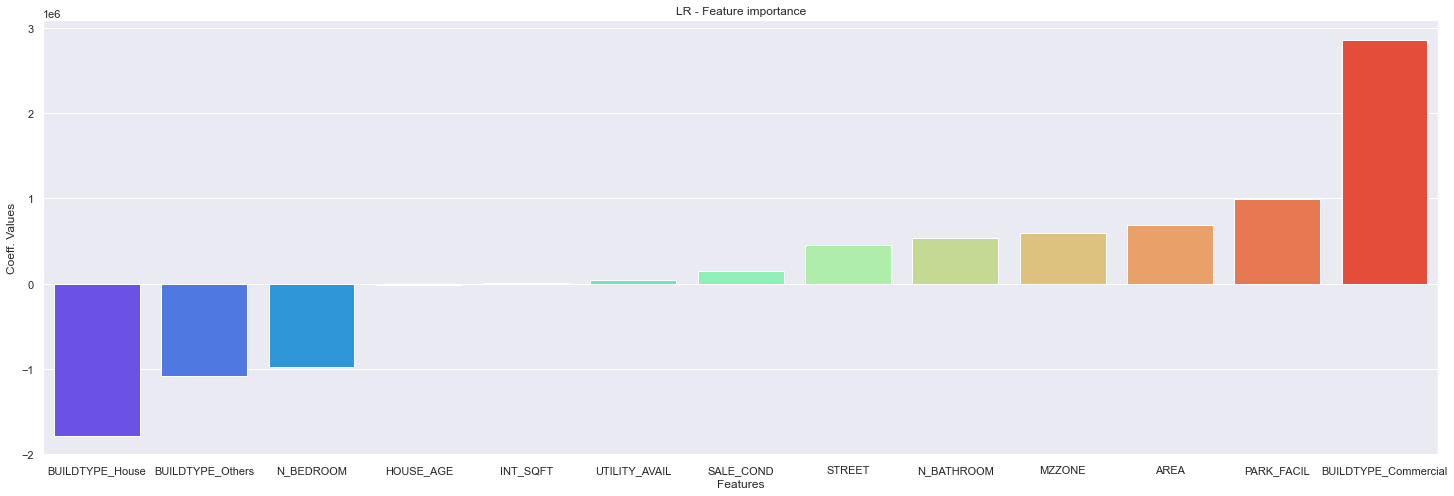

In [416]:
plt.figure(figsize=(25, 8))
sns.barplot(x=coeff_df.index, y=coeff_df.BetaCoefficents, data=coeff_df, 
            palette='rainbow')
plt.title('LR - Feature importance')
plt.xlabel('Features')
plt.ylabel('Coeff. Values')
plt.show()

Correlation between Y_test & Y_predict is:  0.9506925093437409


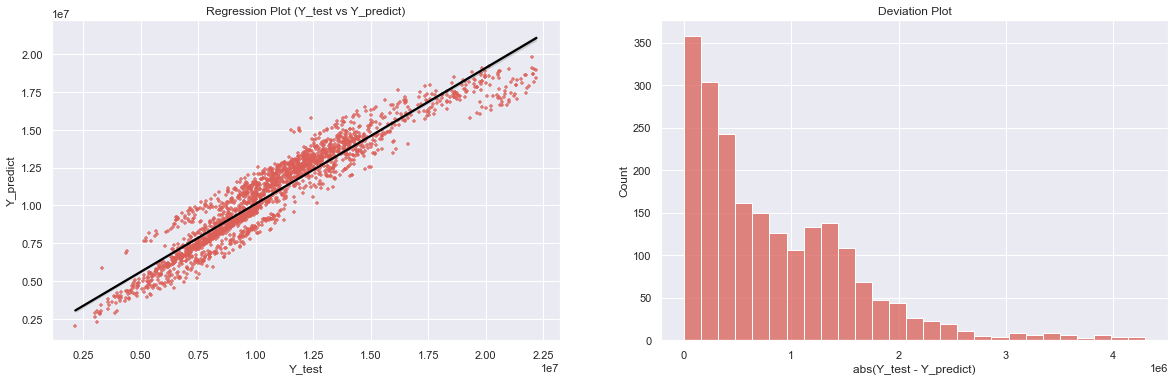

In [434]:
# Regression plot for Y_test & Y_predict
df_LR = pd.DataFrame()
df_LR['Y_test'] = list(Y_test)
df_LR['Y_predict'] = list(Y_predict)
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.regplot(data=df_LR, x='Y_test', y='Y_predict', scatter_kws={'s' : 10}, marker='+', line_kws={'color': 'black'})
plt.title('Regression Plot (Y_test vs Y_predict)')

df_LR['Diff'] = list(abs(Y_test - Y_predict))
plt.subplot(322)
sns.histplot(data=df_LR, x="Diff")
plt.title('Deviation Plot')
plt.xlabel('abs(Y_test - Y_predict)')

print('Correlation between Y_test & Y_predict is: ', df_LR.corr()['Y_predict'][0])
plt.show()

In [255]:
# Score of Linear Regression
scores.append(r2_score(Y_test, Y_predict)*100)
print('R2 Score for Linear Regression Model: ', scores[0])

R2 Score for Linear Regression Model:  90.37401407426626


## 6.2 XG Boost

In [200]:
#classifier: clf
clf_XGB = XGBRegressor(learning_rate= 0.7, n_estimators=100, verbosity=0) # best learning rate = 0.15 why? cross
clf_XGB.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [201]:
Y_predict = clf_XGB.predict(X_test)
Y_predict

array([10301082., 11420853., 14216736., ..., 10616399., 13205679.,
        5577164.], dtype=float32)

In [202]:
# Score of XGB Boost
scores.append(r2_score(Y_test, Y_predict)*100)
scores[1]

99.05048049056872

## 6.3 Random Forest

In [203]:
#classifier: clf
clf_RF = ensemble.RandomForestRegressor(n_estimators=150)
clf_RF.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=150)

In [204]:
Y_predict = clf_RF.predict(X_test)
Y_predict

array([10585080.1       ,  9998293.33333333, 14364812.63333333, ...,
       10378905.        , 12805152.93333333,  5670180.83333333])

In [205]:
# Score of Random Forest
scores.append(r2_score(Y_test, Y_predict)*100)
scores[2]

98.73891945665906

## 6.4 Decision Tree

In [206]:
#classifier: clf
clf_DT = tree.DecisionTreeRegressor(random_state=42, max_depth=40)
clf_DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=40, random_state=42)

In [207]:
Y_predict = clf_DT.predict(X_test)
Y_predict

array([11197455., 10175500., 14927280., ..., 10175500., 13027180.,
        5818500.])

In [208]:
# Score of XGB Boost
scores.append(r2_score(Y_test, Y_predict)*100)
scores[3]

97.16146001905679

# 7. CONCLUSION

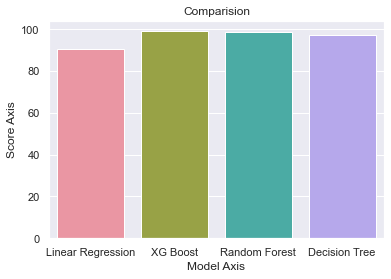

In [209]:
labels = ['Linear Regression', 'XG Boost', 'Random Forest', 'Decision Tree']
sns.barplot(labels, scores)
plt.title('Comparision')
plt.ylabel('Score Axis')
plt.xlabel('Model Axis')
plt.show()

In [210]:
scores

[90.37401407426626, 99.05048049056872, 98.73891945665906, 97.16146001905679]

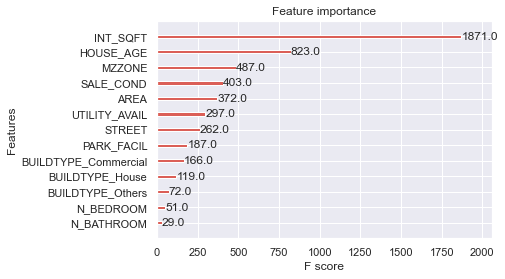

In [211]:
plot_importance(clf_XGB)
plt.show()

In [212]:
print(clf_XGB.feature_importances_)

[0.33053246 0.01666752 0.00666143 0.01294172 0.00200728 0.01837725
 0.00086385 0.01142697 0.02693206 0.00129071 0.5539704  0.01744599
 0.00088236]


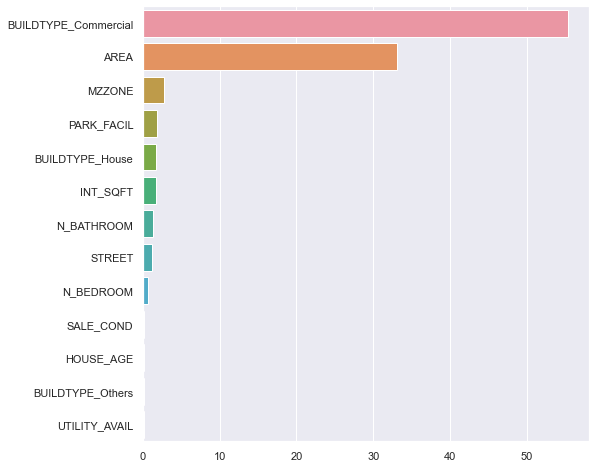

In [213]:
feature_scores = (pd.Series(clf_XGB.feature_importances_, index=X_train.columns).sort_values(ascending=False))*100
plt.figure(figsize=(8, 8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.show()